#### IMPORTS AND VIEWING DATASETS

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('HCV.csv')
df.head()

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,...,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading,Baselinehistological staging
0,56,1,35,2,1,1,1,2,2,2,...,5,5,5,655330,634536,288194,5,5,13,2
1,46,1,29,1,2,2,1,2,2,1,...,57,123,44,40620,538635,637056,336804,31085,4,2
2,57,1,33,2,2,2,2,1,1,1,...,5,5,5,571148,661346,5,735945,558829,4,4
3,49,2,33,1,2,1,2,1,2,1,...,48,77,33,1041941,449939,585688,744463,582301,10,3
4,59,1,32,1,1,2,1,2,2,2,...,94,90,30,660410,738756,3731527,338946,242861,11,1


In [3]:
dfd = pd.read_csv('Discretization.csv')
dfd

,Feature Names,Feature Values,Discretization (Items)
0,Age,32:61,"[0; 32], ]32; 37], ]37; 42],]42; 47], ]47; 52]..."
1,Gender,"Male,Female","[Male], [Female]"
2,BMI(Body Mass Index),22:35,"[0; 18:5[ [18:5; 25[, [25; 30[, [30; 35[, [35;..."
3,Fever,"Absent, Present","[Absent], [Present] -"
4,Nausea/Vomiting,"Absent, Present","[Absent], [Present] -"
5,Headache,"Absent, Present","[Absent], [Present] -"
6,Diarrhea,"Absent, Present","[Absent], [Present] -"
7,Fatigue,"Absent, Present","[Absent], [Present] -"
8,Bone ache,"Absent, Present","[Absent], [Present] -"
9,Jaundice,"Absent, Present","[Absent], [Present] -"


#### SUPPORTING FUNCTIONS FOR DISCRETIZATION

##### The unique function gives a list of all unique elements in a list

In [4]:
def unique(list1): 
  
    # intilize a null list 
    unique_list = [] 
      
    # traverse for all elements 
    for x in list1: 
        # check if exists in unique_list or not 
        if x not in unique_list: 
            unique_list.append(x) 
    return unique_list

##### The breaks function gives the discretized break points to each of the given attributes

In [5]:
def breaks(a):
    if a in [0,2,11,12,14,15,16,17,18,19,20,21]:
        my_list = dfd['Discretization (Items)'][a].split(";")
        removetable = str.maketrans('', '', "'[]'")
        a = [s.translate(removetable) for s in my_list]
        k=l=[0]*15
        for i in range(0,len(a)):
            if ":" not in a[i]:
                k[i] = a[i].split(",")
                l[i] = int(k[i][0])
                l.sort()
        return unique(l)
    elif a in [1,3,4,5,6,7,8,9,10]:
        my_list = dfd['Feature Values'][a].split(",")
        return my_list
    elif a == 13:
        return [0,2,12,17,20]
    elif a in [22,23,24,25,26]:
        return [0,5,808450,1201715,3731527]
    else:
        my_list = dfd['Discretization (Items)'][a].split(",")
        removetable = str.maketrans('', '', " '[]-'")
        a = [s.translate(removetable) for s in my_list]
        return a

##### The ranger function gives the range in which the value of the given attribute falls in

In [6]:
def ranger(a,t):
    for i in range(0, len(t)):
        if (a > t[i] and t[i] == max(t)):
            x = t[i-1]
            y = t[i]
        elif (a > t[i] and t[i] != max(t)):
            x = t[i]
            y = t[i+1]
    return x,y    

#### DRIVER FUNCTION FOR DISCRETIZATION

In [7]:
from itertools import repeat
d = [[] for i in repeat(None, 30)]

for j in list(df.iloc[:,0]):
    if j<62:
        d[0].append(list(ranger(j, breaks(0))))
    else:
        d[0].append([0,0])

for i in [2,22,23,24,25,26]:
    for j in list(df.iloc[:,i]):
        d[i].append(list(ranger(j, breaks(i))))

for i in [11,12,14,15,16,17,18,19,20,21]:
    for j in list(df.iloc[:,i-1]):
        d[i].append(list(ranger(j, breaks(i))))

for i in [1,3,4,5,6,7]:
    for j in list(df.iloc[:,i]):
        if j == 1:
            d[i].append(breaks(i)[0])
        elif j == 2:
            d[i].append(breaks(i)[1])
        else:
            d[i].append("NaN")

for i in [9,10]:
    for j in list(df.iloc[:,i-1]):
        if j == 1:
            d[i].append(breaks(i)[0])
        elif j == 2:
            d[i].append(breaks(i)[1])
        else:
            d[i].append("NaN")            


for j in list(df.iloc[:,12]):
    d[13].append(ranger(j, breaks(13)))

for j in list(df.iloc[:,28]):
    if j == 1:
        d[28].append(breaks(28)[1])
    elif j == 2:
        d[28].append(breaks(28)[2])
    elif j == 3:
        d[28].append(breaks(28)[3])
    else:
        d[28].append(breaks(28)[4])

d[27] = df.iloc[:,27]

for j in list(df.iloc[:,21]):
    d[29].append(list(ranger(j, breaks(21))))
    
d.remove(d[8])

##### Dataset classified obtained using Discretization parameters in the supporting file

In [8]:
df_final = pd.DataFrame(np.array(d).T.tolist(), columns = ['Age',
 'Gender',
 'BMI',
 'Fever',
 'Nausea/Vomting',
 'Headache ',
 'Diarrhea ',
 'Fatigue & generalized bone ache ',
 'Jaundice ',
 'Epigastric pain ',
 'WBC',
 'RBC',
 'HGB',
 'Plat',
 'AST 1',
 'ALT 1',
 'ALT4',
 'ALT 12',
 'ALT 24',
 'ALT 36',
 'ALT 48',
 'RNA Base',
 'RNA 4',
 'RNA 12',
 'RNA EOT',
 'RNA EF',
 'Baseline histological Grading',
 'Baselinehistological staging',
 'ALT after 24 w'])
df_final.head()

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,...,ALT 36,ALT 48,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading,Baselinehistological staging,ALT after 24 w
0,"[52, 57]",Male,"[30, 35]",Present,Absent,Absent,Absent,Present,Present,Present,...,"[0, 20]","[0, 20]","[5, 808450]","[5, 808450]","[5, 808450]","[0, 5]","[0, 5]",13,Staging(ClassLabel)FewSepta,"[0, 20]"
1,"[42, 47]",Male,"[25, 30]",Absent,Present,Present,Absent,Present,Present,Absent,...,"[40, 128]","[40, 128]","[5, 808450]","[5, 808450]","[5, 808450]","[5, 808450]","[5, 808450]",4,Staging(ClassLabel)FewSepta,"[40, 128]"
2,"[52, 57]",Male,"[30, 35]",Present,Present,Present,Present,Absent,Absent,Absent,...,"[0, 20]","[0, 20]","[5, 808450]","[5, 808450]","[0, 5]","[5, 808450]","[5, 808450]",4,Cirrhosis,"[0, 20]"
3,"[47, 52]",Female,"[30, 35]",Absent,Present,Absent,Present,Absent,Present,Absent,...,"[40, 128]","[40, 128]","[808450, 1201715]","[5, 808450]","[5, 808450]","[5, 808450]","[5, 808450]",10,ManySepta,"[20, 40]"
4,"[57, 62]",Male,"[30, 35]",Absent,Absent,Present,Absent,Present,Present,Present,...,"[40, 128]","[40, 128]","[5, 808450]","[5, 808450]","[1201715, 3731527]","[5, 808450]","[5, 808450]",11,PortalFibrosis,"[20, 40]"


In [9]:
df_final.to_csv("k.csv", index=False)

### PHASE 2 (Delivery 3)

#### Further operations on the data for better understanding

In [10]:
k=pd.read_csv("k.csv")
k.head()

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,...,ALT 36,ALT 48,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading,Baselinehistological staging,ALT after 24 w
0,"[52, 57]",Male,"[30, 35]",Present,Absent,Absent,Absent,Present,Present,Present,...,"[0, 20]","[0, 20]","[5, 808450]","[5, 808450]","[5, 808450]","[0, 5]","[0, 5]",13,Staging(ClassLabel)FewSepta,"[0, 20]"
1,"[42, 47]",Male,"[25, 30]",Absent,Present,Present,Absent,Present,Present,Absent,...,"[40, 128]","[40, 128]","[5, 808450]","[5, 808450]","[5, 808450]","[5, 808450]","[5, 808450]",4,Staging(ClassLabel)FewSepta,"[40, 128]"
2,"[52, 57]",Male,"[30, 35]",Present,Present,Present,Present,Absent,Absent,Absent,...,"[0, 20]","[0, 20]","[5, 808450]","[5, 808450]","[0, 5]","[5, 808450]","[5, 808450]",4,Cirrhosis,"[0, 20]"
3,"[47, 52]",Female,"[30, 35]",Absent,Present,Absent,Present,Absent,Present,Absent,...,"[40, 128]","[40, 128]","[808450, 1201715]","[5, 808450]","[5, 808450]","[5, 808450]","[5, 808450]",10,ManySepta,"[20, 40]"
4,"[57, 62]",Male,"[30, 35]",Absent,Absent,Present,Absent,Present,Present,Present,...,"[40, 128]","[40, 128]","[5, 808450]","[5, 808450]","[1201715, 3731527]","[5, 808450]","[5, 808450]",11,PortalFibrosis,"[20, 40]"


In [11]:
for i in list(k.columns):
    print(i, ":", type(k[i][0]))

Age : <class 'str'>
Gender : <class 'str'>
BMI : <class 'str'>
Fever : <class 'str'>
Nausea/Vomting : <class 'str'>
Headache  : <class 'str'>
Diarrhea  : <class 'str'>
Fatigue & generalized bone ache  : <class 'str'>
Jaundice  : <class 'str'>
Epigastric pain  : <class 'str'>
WBC : <class 'str'>
RBC : <class 'str'>
HGB : <class 'str'>
Plat : <class 'str'>
AST 1 : <class 'str'>
ALT 1 : <class 'str'>
ALT4 : <class 'str'>
ALT 12 : <class 'str'>
ALT 24 : <class 'str'>
ALT 36 : <class 'str'>
ALT 48 : <class 'str'>
RNA Base : <class 'str'>
RNA 4 : <class 'str'>
RNA 12 : <class 'str'>
RNA EOT : <class 'str'>
RNA EF : <class 'str'>
Baseline histological Grading : <class 'numpy.int64'>
Baselinehistological staging : <class 'str'>
ALT after 24 w : <class 'str'>


#### INTERESTING OBSERVATION
#### When I read the file again, all the list datatypes have converted into string type. This is because Excel does not have the capability to save list type data points and has stored them as character variables instead.

#### Checking all the unique data points after discretization

In [12]:
for i in k.columns:
    print(i, ":", k[i].unique())

Age : ['[52, 57]' '[42, 47]' '[47, 52]' '[57, 62]' '[37, 42]' '[32, 37]'
 '[0, 32]']
Gender : ['Male' 'Female']
BMI : ['[30, 35]' '[25, 30]' '[0, 25]']
Fever : [' Present' 'Absent']
Nausea/Vomting : ['Absent' ' Present']
Headache  : ['Absent' ' Present']
Diarrhea  : ['Absent' ' Present']
Fatigue & generalized bone ache  : [' Present' 'Absent']
Jaundice  : [' Present' 'Absent']
Epigastric pain  : [' Present' 'Absent']
WBC : ['[4000, 11000]' '[11000, 12101]' '[0, 4000]']
RBC : ['[3000000, 5000000]' '[5000000, 5018451]']
HGB : ['(12, 17)' '(2, 12)']
Plat : ['[100000, 226465]' '[93013, 100000]' '[0, 93013]']
AST 1 : ['[40, 128]' '[20, 40]']
ALT 1 : ['[40, 128]' '[20, 40]']
ALT4 : ['[40, 128]' '[20, 40]']
ALT 12 : ['[40, 128]' '[20, 40]']
ALT 24 : ['[40, 128]' '[20, 40]']
ALT 36 : ['[0, 20]' '[40, 128]' '[20, 40]']
ALT 48 : ['[0, 20]' '[40, 128]' '[20, 40]']
RNA Base : ['[5, 808450]' '[808450, 1201715]']
RNA 4 : ['[5, 808450]' '[808450, 1201715]' '[0, 5]']
RNA 12 : ['[5, 808450]' '[0, 5]' '

#### Converting all the test result ranges to understandable English terms with internet research.

In [13]:
k["BMI"] = np.where(k['BMI'] == '[0, 25]', 'Normal', k['BMI'])
k["BMI"] = np.where(k['BMI'] == '[25, 30]', 'Obese', k['BMI'])
k["BMI"] = np.where(k['BMI'] == '[30, 35]', 'Overwheight', k['BMI'])

k["WBC"] = np.where(k['WBC'] == '[0, 4000]', 'Low', k['WBC'])
k["WBC"] = np.where(k['WBC'] == '[4000, 11000]', 'Normal', k['WBC'])
k["WBC"] = np.where(k['WBC'] == '[11000, 12101]', 'High', k['WBC'])

k["RBC"] = np.where(k['RBC'] == '[3000000, 5000000]', 'Normal', k['RBC'])
k["RBC"] = np.where(k['RBC'] == '[5000000, 5018451]', 'Elevated', k['RBC'])

k["HGB"] = np.where(k['HGB'] == '(2, 12)', 'Low', k['HGB'])
k["HGB"] = np.where(k['HGB'] == '(12, 17)', 'Normal', k['HGB'])

k["Plat"] = np.where(k['Plat'] == '[0, 93013]', 'Extremely Low', k['Plat'])
k["Plat"] = np.where(k['Plat'] == '[93013, 100000]', 'Low', k['Plat'])
k["Plat"] = np.where(k['Plat'] == '[100000, 226465]', 'Normal', k['Plat'])

k["AST 1"] = np.where(k["AST 1"] == '[20, 40]', 'Normal', k["AST 1"])
k["AST 1"] = np.where(k["AST 1"] == '[40, 128]', 'Elevated', k["AST 1"])

k["ALT 1"] = np.where(k["ALT 1"] == '[20, 40]', 'Normal', k["ALT 1"])
k["ALT 1"] = np.where(k["ALT 1"] == '[40, 128]', 'Elevated', k["AST 1"])

k["ALT4"] = np.where(k["ALT4"] == '[20, 40]', 'Normal', k["ALT4"])
k["ALT4"] = np.where(k["ALT4"] == '[40, 128]', 'Elevated', k["ALT4"])

k["ALT 12"] = np.where(k["ALT 12"] == '[20, 40]', 'Normal', k["ALT 12"])
k["ALT 12"] = np.where(k["ALT 12"] == '[40, 128]', 'Elevated', k["ALT 12"])

k["ALT 24"] = np.where(k["ALT 24"] == '[20, 40]', 'Normal', k["ALT 24"])
k["ALT 24"] = np.where(k["ALT 24"] == '[40, 128]', 'Elevated', k["ALT 24"])

k["ALT 36"] = np.where(k["ALT 36"] == '[0, 20]', 'Low', k["ALT 36"])
k["ALT 36"] = np.where(k["ALT 36"] == '[20, 40]', 'Normal', k["ALT 36"])
k["ALT 36"] = np.where(k["ALT 36"] == '[40, 128]', 'Elevated', k["ALT 36"])

k["ALT 48"] = np.where(k["ALT 48"] == '[0, 20]', 'Low', k["ALT 48"])
k["ALT 48"] = np.where(k["ALT 48"] == '[20, 40]', 'Normal', k["ALT 48"])
k["ALT 48"] = np.where(k["ALT 48"] == '[40, 128]', 'Elevated', k["ALT 48"])

k["ALT after 24 w"] = np.where(k["ALT after 24 w"] == '[0, 20]', 'Low', k["ALT after 24 w"])
k["ALT after 24 w"] = np.where(k["ALT after 24 w"] == '[20, 40]', 'Normal', k["ALT after 24 w"])
k["ALT after 24 w"] = np.where(k["ALT after 24 w"] == '[40, 128]', 'Elevated', k["ALT after 24 w"])

k["RNA Base"] = np.where(k["RNA Base"] == '[0, 5]', "No Virus", k["RNA Base"])
k["RNA Base"] = np.where(k["RNA Base"] == '[5, 808450]', "Low", k["RNA Base"])
k["RNA Base"] = np.where(k["RNA Base"] == '[808450, 1201715]', "High", k["RNA Base"])
k["RNA Base"] = np.where(k["RNA Base"] == '[1201715, 3731527]', "Extremely High", k["RNA Base"])

k["RNA 4"] = np.where(k["RNA 4"] == '[0, 5]', "No Virus", k["RNA 4"])
k["RNA 4"] = np.where(k["RNA 4"] == '[5, 808450]', "Low", k["RNA 4"])
k["RNA 4"] = np.where(k["RNA 4"] == '[808450, 1201715]', "High", k["RNA 4"])
k["RNA 4"] = np.where(k["RNA 4"] == '[1201715, 3731527]', "Extremely High", k["RNA 4"])

k["RNA 12"] = np.where(k["RNA 12"] == '[0, 5]', "No Virus", k["RNA 12"])
k["RNA 12"] = np.where(k["RNA 12"] == '[5, 808450]', "Low", k["RNA 12"])
k["RNA 12"] = np.where(k["RNA 12"] == '[808450, 1201715]', "High", k["RNA 12"])
k["RNA 12"] = np.where(k["RNA 12"] == '[1201715, 3731527]', "Extremely High", k["RNA 12"])

k["RNA EOT"] = np.where(k["RNA EOT"] == '[0, 5]', "No Virus", k["RNA EOT"])
k["RNA EOT"] = np.where(k["RNA EOT"] == '[5, 808450]', "Low", k["RNA EOT"])
k["RNA EOT"] = np.where(k["RNA EOT"] == '[808450, 1201715]', "High", k["RNA EOT"])
k["RNA EOT"] = np.where(k["RNA EOT"] == '[1201715, 3731527]', "Extremely High", k["RNA EOT"])

k["RNA EF"] = np.where(k["RNA EF"] == '[0, 5]', "No Virus", k["RNA EF"])
k["RNA EF"] = np.where(k["RNA EF"] == '[5, 808450]', "Low", k["RNA EF"])
k["RNA EF"] = np.where(k["RNA EF"] == '[808450, 1201715]', "High", k["RNA EF"])
k["RNA EF"] = np.where(k["RNA EF"] == '[1201715, 3731527]', "Extremely High", k["RNA EF"])



In [14]:
k["Baselinehistological staging"] = np.where(k["Baselinehistological staging"] == "Staging(ClassLabel)FewSepta", "Few Septa", k["Baselinehistological staging"])

In [15]:
k.head()

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,...,ALT 36,ALT 48,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading,Baselinehistological staging,ALT after 24 w
0,"[52, 57]",Male,Overwheight,Present,Absent,Absent,Absent,Present,Present,Present,...,Low,Low,Low,Low,Low,No Virus,No Virus,13,Few Septa,Low
1,"[42, 47]",Male,Obese,Absent,Present,Present,Absent,Present,Present,Absent,...,Elevated,Elevated,Low,Low,Low,Low,Low,4,Few Septa,Elevated
2,"[52, 57]",Male,Overwheight,Present,Present,Present,Present,Absent,Absent,Absent,...,Low,Low,Low,Low,No Virus,Low,Low,4,Cirrhosis,Low
3,"[47, 52]",Female,Overwheight,Absent,Present,Absent,Present,Absent,Present,Absent,...,Elevated,Elevated,High,Low,Low,Low,Low,10,ManySepta,Normal
4,"[57, 62]",Male,Overwheight,Absent,Absent,Present,Absent,Present,Present,Present,...,Elevated,Elevated,Low,Low,Extremely High,Low,Low,11,PortalFibrosis,Normal


In [16]:
for i in k.columns:
    print(i, ":", k[i].unique())

Age : ['[52, 57]' '[42, 47]' '[47, 52]' '[57, 62]' '[37, 42]' '[32, 37]'
 '[0, 32]']
Gender : ['Male' 'Female']
BMI : ['Overwheight' 'Obese' 'Normal']
Fever : [' Present' 'Absent']
Nausea/Vomting : ['Absent' ' Present']
Headache  : ['Absent' ' Present']
Diarrhea  : ['Absent' ' Present']
Fatigue & generalized bone ache  : [' Present' 'Absent']
Jaundice  : [' Present' 'Absent']
Epigastric pain  : [' Present' 'Absent']
WBC : ['Normal' 'High' 'Low']
RBC : ['Normal' 'Elevated']
HGB : ['Normal' 'Low']
Plat : ['Normal' 'Low' 'Extremely Low']
AST 1 : ['Elevated' 'Normal']
ALT 1 : ['Elevated' 'Normal']
ALT4 : ['Elevated' 'Normal']
ALT 12 : ['Elevated' 'Normal']
ALT 24 : ['Elevated' 'Normal']
ALT 36 : ['Low' 'Elevated' 'Normal']
ALT 48 : ['Low' 'Elevated' 'Normal']
RNA Base : ['Low' 'High']
RNA 4 : ['Low' 'High' 'No Virus']
RNA 12 : ['Low' 'No Virus' 'Extremely High' 'High']
RNA EOT : ['No Virus' 'Low']
RNA EF : ['No Virus' 'Low' 'High']
Baseline histological Grading : [13  4 10 11 12  5 15 16  

In [17]:
k.to_csv("disc2.csv", index=False)

#### VISUALIZATIONS AND OBSERVATIONS

In [18]:
import matplotlib.pyplot as plt 
plt.rc("font", size=14)

import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

sns.countplot(x='Age', data = k)
plt.show()

sns.countplot(y = "Baselinehistological staging", data = k)
plt.show()

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

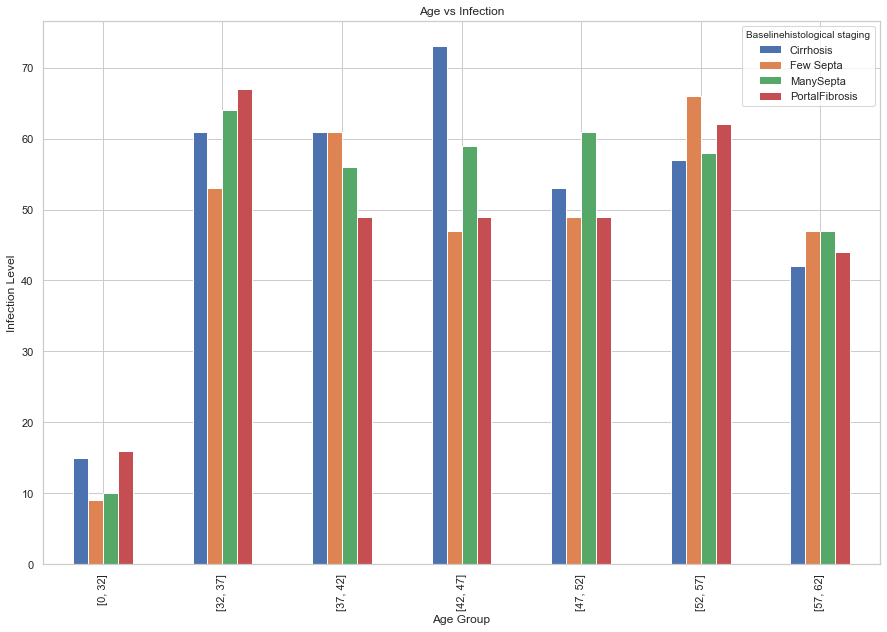

In [19]:
%matplotlib inline
pd.crosstab(k["Age"],k["Baselinehistological staging"]).plot(kind='bar', figsize = (15,10))
plt.title('Age vs Infection')
plt.xlabel('Age Group')
plt.ylabel('Infection Level')
plt.savefig('age_vs_infection')

#### OBSERVATIONS
    Cirrhosis (Advanced level of infection, the stage just before cancer) is observed mostly in the age group of 47yrs to 52yrs.

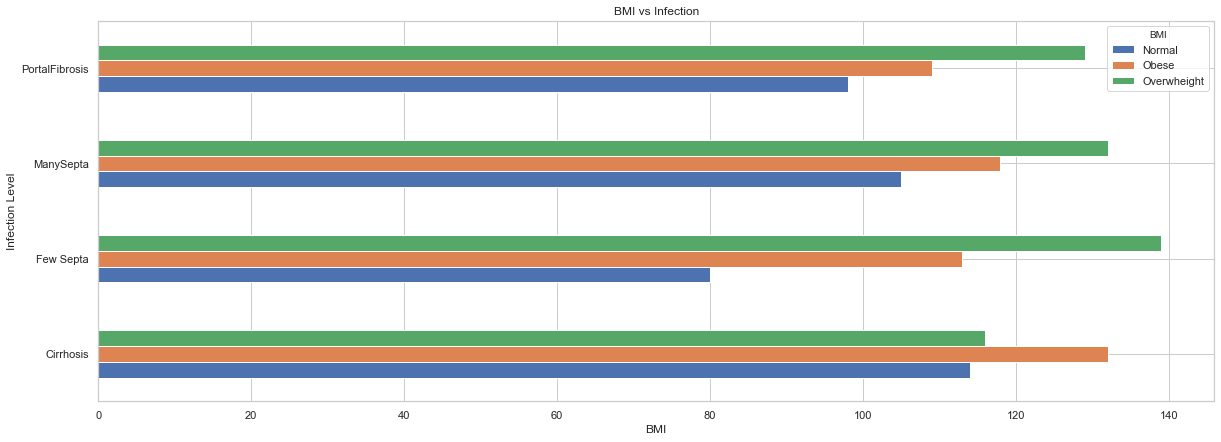

In [20]:
pd.crosstab(k["Baselinehistological staging"],k["BMI"]).plot(kind='barh', figsize = (20,7))
plt.title('BMI vs Infection')
plt.xlabel('BMI')
plt.ylabel('Infection Level')
plt.savefig('bmi_vs_infection')

#### OBSERVATIONS
    In the above chart an overall trend can be observed where Overweight people suffer with higher infection levels. One anomaly is that Cirrhotic patients are obese more than they're overweight. Here an assumption can be done that most of the overweight patients have crossed over to the cancer stage along the course of the study and were no longer part of it. 

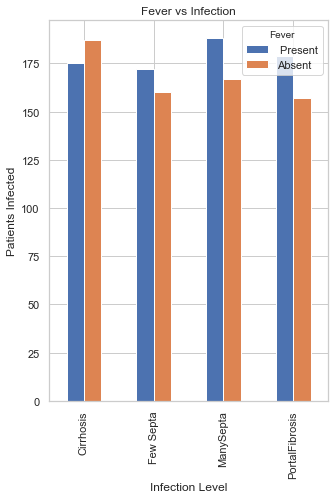

In [21]:
pd.crosstab(k["Baselinehistological staging"],k["Fever"]).plot(kind='bar', figsize = (5,7))
plt.title('Fever vs Infection')
plt.xlabel('Infection Level')
plt.ylabel('Patients Infected')
plt.savefig('Fever_vs_infection')

#### OBSERVATIONS
    This is a 50-50 case where the infection is causing the fever. A fever is generally caused when the WBC react with the virus. Another reason that causes a spike in temperature is the patients being under constant medication.

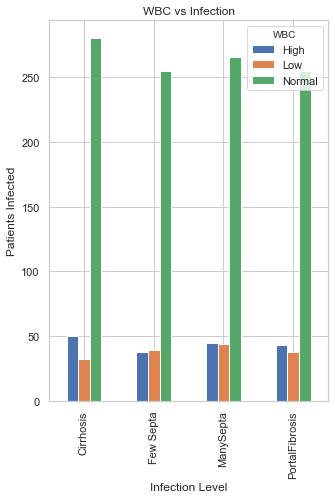

In [22]:
pd.crosstab(k["Baselinehistological staging"],k["WBC"]).plot(kind='bar', figsize = (5,7))
plt.title('WBC vs Infection')
plt.xlabel('Infection Level')
plt.ylabel('Patients Infected')
plt.savefig('WBC_vs_infection')

#### OBSERVATIONS
    1. Not much of a correlation between WBC and infected patients / infection level. Most of the patients display normal WBC levels.
    2. Resonates with the fact that WBC can't act on HCV like they do on other generic diseases and viruses.
    3. Confirms the fact that the medication caused the spike in temperature in the patients.

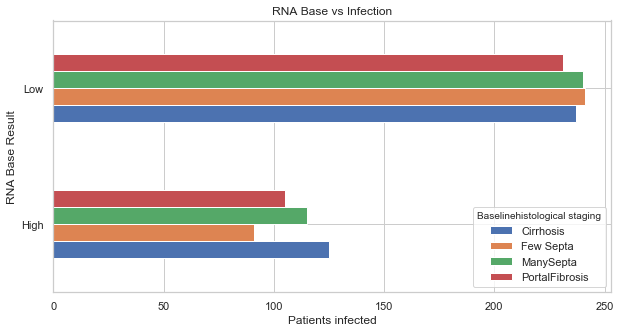

In [23]:
pd.crosstab(k["RNA Base"],k["Baselinehistological staging"]).plot(kind='barh', figsize = (10,5))
plt.title('RNA Base vs Infection')
plt.xlabel('Patients infected')
plt.ylabel('RNA Base Result')
plt.savefig('rnaBase_vs_infection')

#### PRETEXT
    The HCV RNA PCR test is a blood test that helps a doctor diagnose hepatitis C. The test measures the level of the hepatitis C virus in the bloodstream. Here, RNA Base result is the test conducted on the patients at the start of the study.
#### OBSERVATIONS
    A trend can be observed right out that most number of patients with the infection have a lower RNA Base result. But if we look closely, among people with low RNA Base result, the infection is less i.e, Few Septa and for those with higher RNA Base result, Cirrhosis is more common.

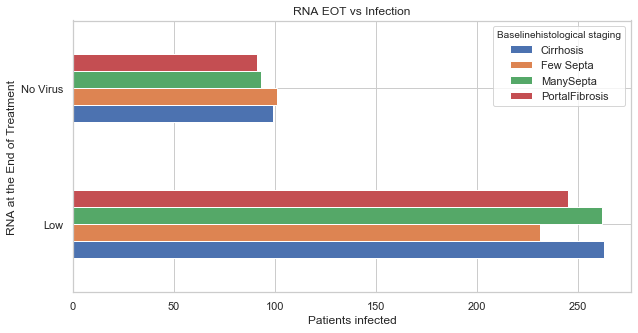

In [24]:
pd.crosstab(k["RNA EOT"],k["Baselinehistological staging"]).plot(kind='barh', figsize = (10,5))
plt.title('RNA EOT vs Infection')
plt.xlabel('Patients infected')
plt.ylabel('RNA at the End of Treatment')
plt.savefig('rnaEOT_vs_infection')

#### OBSERVATIONS
    1. When compared to  the RNA Base Result, the RNA count at the End of Treatment is much lower in the patients. 
    2. Also, start of the treatment has patients ranging from low to high RNA counts and at the end of treatment, the patients have come down to low and No virus levels with 0% with high RNA counts.

### Classification

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop('Baselinehistological staging', axis=1), df['Baselinehistological staging'], test_size=0.25, random_state=1)

#### Fitting the raw data, without discretization onto the available classification algorithms. 
##### Observation: To apply machine learning on the discretized dataset, it needs to be encoded to simpler numerical values with the help of tools like OneHotEncoder etc. But the result of this encoding will come out similar to be the initial raw dataset. Therefore, to avoid redundancies and cut down runtimes, all the machine learning techniques have been applied on the raw dataset and not on the discretized dataset.

C:\Users\harsha654\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Logistic Train data accuracy:  29.29 %
Logistic Test data accuracy:  24.21 %

NaiveBayes(G) Train data accuracy:  33.62 %
NaiveBayes(G) Test data accuracy:  22.48 %
NaiveBayes(G) Cross val score:  0.24691898654989056

Decision Tree Train data accuracy:  100.0 %
Decision Tree Test data accuracy:  24.78 %
Decision Tree Cross val score:  0.24192993431341883

KNN Training set accuracy:  57.32 %

KNN Testing set accuracy:  24.21 %


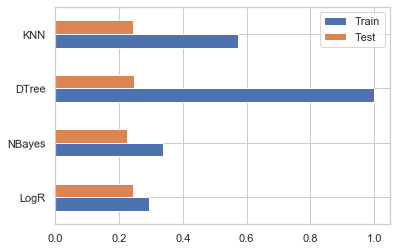

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

lor = LogisticRegression()
clf = lor.fit(X_train,y_train)

LOTrS = (sum(clf.predict(X_train)==y_train))/len(X_train)
LOTeS = (sum(clf.predict(X_test)==y_test))/len(X_test)
print("Logistic Train data accuracy: ", round((100*LOTrS),2), "%")
print("Logistic Test data accuracy: ", round((100*LOTeS),2), "%")

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)
nbTrS = (sum(gnb.predict(X_train)==y_train))/len(X_train)
nbTeS = (sum(gnb.predict(X_test)==y_test))/len(X_test)
print("\nNaiveBayes(G) Train data accuracy: ", round((100*nbTrS),2), "%")
print("NaiveBayes(G) Test data accuracy: ", round((100*nbTeS),2), "%")

nbscore = cross_val_score(gnb, df.drop('Baselinehistological staging', axis=1), df['Baselinehistological staging'], cv=10)
print("NaiveBayes(G) Cross val score: ", nbscore.mean())

from sklearn import tree
dtree = tree.DecisionTreeClassifier()
dtr = dtree.fit(X_train,y_train)
dtTrS = (sum(dtr.predict(X_train)==y_train))/len(X_train)
dtTeS = (sum(dtr.predict(X_test)==y_test))/len(X_test)
print("\nDecision Tree Train data accuracy: ", round((100*dtTrS),2), "%")
print("Decision Tree Test data accuracy: ", round((100*dtTeS),2), "%")


score = cross_val_score(dtree, df.drop('Baselinehistological staging', axis=1), df['Baselinehistological staging'], cv=10)
print("Decision Tree Cross val score: ", score.mean())

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)
knn.predict(X_train)

KTrS = accuracy_score(y_train, knn.predict(X_train))
print("\nKNN Training set accuracy: ", round((100*KTrS),2), "%")

KTeS = accuracy_score(y_test, knn.predict(X_test))
print("\nKNN Testing set accuracy: ", round((100*KTeS),2), "%")

tr_score_list = [LOTrS, nbTrS, dtTrS, KTrS]
te_score_list = [LOTeS, nbTeS, dtTeS, KTeS]

dt = pd.DataFrame({'Train': tr_score_list, 'Test': te_score_list}, index = ['LogR', 'NBayes', 'DTree', 'KNN'])

dt.plot.barh(rot=1)


RandomForest Train data accuracy:  39.98 %
RandomForest Test data accuracy:  26.51 %
RandomForest Cross val score:  0.24692941299134605
Feature ranking:
1. feature 2 (0.090984)
2. feature 22 (0.090734)
3. feature 10 (0.089634)
4. feature 25 (0.063504)
5. feature 20 (0.063330)
6. feature 11 (0.061908)
7. feature 23 (0.055984)
8. feature 17 (0.049913)
9. feature 26 (0.043517)
10. feature 24 (0.041305)
11. feature 1 (0.040489)
12. feature 14 (0.038276)
13. feature 15 (0.037395)
14. feature 0 (0.034903)
15. feature 19 (0.033891)
16. feature 13 (0.032937)
17. feature 27 (0.025370)
18. feature 16 (0.024770)
19. feature 18 (0.022636)
20. feature 21 (0.020023)
21. feature 12 (0.018905)
22. feature 5 (0.008933)
23. feature 7 (0.007292)
24. feature 6 (0.003366)
25. feature 9 (0.000000)
26. feature 8 (0.000000)
27. feature 4 (0.000000)
28. feature 3 (0.000000)
Feature importance order:  ['BMI', 'RNA Base', 'WBC', 'RNA EOT', 'ALT 48', 'RBC', 'RNA 4', 'ALT 12', 'RNA EF', 'RNA 12', 'Gender', 'AST 1

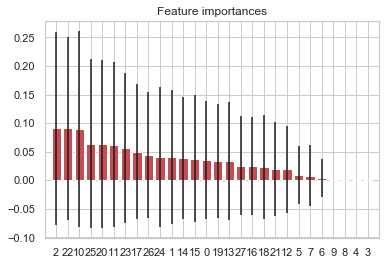

In [27]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(max_depth=2, random_state=0)
X = df.drop('Baselinehistological staging', axis=1)
y = df['Baselinehistological staging']
rfc = rfcl.fit(X_train,y_train)
rfTrS = (sum(rfc.predict(X_train)==y_train))/len(X_train)
rfTeS = (sum(rfc.predict(X_test)==y_test))/len(X_test)
print("\nRandomForest Train data accuracy: ", round((100*rfTrS),2), "%")
print("RandomForest Test data accuracy: ", round((100*rfTeS),2), "%")

rfscore = cross_val_score(rfcl, df.drop('Baselinehistological staging', axis=1), df['Baselinehistological staging'], cv=10)
print("RandomForest Cross val score: ", rfscore.mean())

importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
p=[]
for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
    p.append(indices[f])
rf_ord=[]
for i in p:
    rf_ord.append(list(df.columns)[i])
print("Feature importance order: ", rf_ord)
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

ETC Test Accuracy Score:  0.2420749279538905
Feature ranking:
1. feature 20 (0.042121)
2. feature 16 (0.041934)
3. feature 15 (0.041830)
4. feature 22 (0.041754)
5. feature 2 (0.041679)
6. feature 19 (0.041380)
7. feature 21 (0.041339)
8. feature 0 (0.040674)
9. feature 23 (0.040441)
10. feature 11 (0.040196)
11. feature 17 (0.040151)
12. feature 18 (0.040135)
13. feature 14 (0.040049)
14. feature 13 (0.039926)
15. feature 10 (0.039917)
16. feature 27 (0.039771)
17. feature 12 (0.038655)
18. feature 25 (0.038204)
19. feature 26 (0.037281)
20. feature 24 (0.036183)
21. feature 7 (0.026818)
22. feature 6 (0.026648)
23. feature 4 (0.026192)
24. feature 5 (0.025965)
25. feature 3 (0.025123)
26. feature 8 (0.023904)
27. feature 9 (0.021870)
28. feature 1 (0.019862)
Feature importance order:  ['ALT 48', 'ALT4', 'ALT 1', 'RNA Base', 'BMI', 'ALT 36', 'ALT after 24 w', 'Age ', 'RNA 4', 'RBC', 'ALT 12', 'ALT 24', 'AST 1', 'Plat', 'WBC', 'Baseline histological Grading', 'HGB', 'RNA EOT', 'RNA EF'

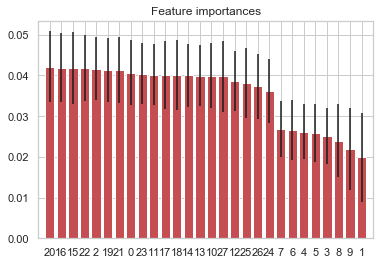

In [38]:
from sklearn.ensemble import ExtraTreesClassifier
# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)


forest.fit(X_train, y_train)
print("ETC Test Accuracy Score: ", (sum(forest.predict(X_test)==y_test))/len(X_test))
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
p=[]
for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
    p.append(indices[f])
erf_ord=[]
for i in p:
    erf_ord.append(list(df.columns)[i])
print("Feature importance order: ", erf_ord)
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

GBC:  0.2507204610951009
GBC Feature Importance Order: 
 ['RNA 4', 'RNA Base', 'Plat', 'RNA EF', 'RBC', 'WBC', 'ALT 48', 'RNA 12', 'RNA EOT', 'ALT 1', 'AST 1', 'ALT 12', 'ALT 24', 'BMI', 'ALT4', 'ALT 36', 'ALT after 24 w', 'Baseline histological Grading', 'Gender', 'Age ', 'HGB', 'Epigastric pain ', 'Jaundice ', 'Fatigue & generalized bone ache ', 'Diarrhea ', 'Headache ', 'Nausea/Vomting', 'Fever']


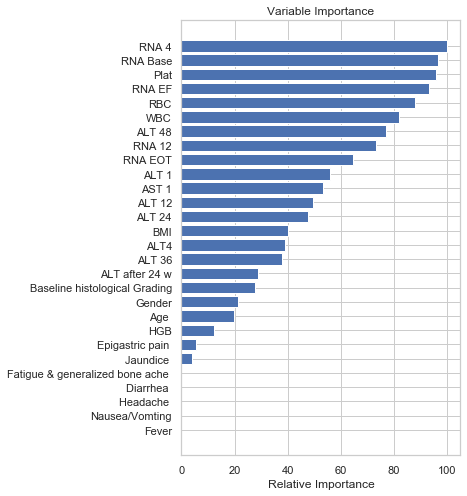

In [29]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=50, learning_rate=1.0, max_depth=1, random_state=1).fit(X_train, y_train)
print("GBC: ", gbc.score(X_test, y_test))
feature_importance = gbc.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
#plt.subplot(1,1,1)
plt.figure(figsize=(5,8))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, df.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
v_gb = list(df.columns[sorted_idx])
v_gb.reverse()
print("GBC Feature Importance Order: \n", v_gb)
plt.show()

Accuracy: 24.50%
XGB Feature Importance Order: 
 ['Jaundice ', 'RNA EOT', 'Gender', 'ALT 12', 'RNA EF', 'ALT 36', 'ALT4', 'AST 1', 'ALT after 24 w', 'ALT 1', 'BMI', 'ALT 24', 'RNA 4', 'ALT 48', 'RBC', 'RNA 12', 'HGB', 'RNA Base', 'Age ', 'Baseline histological Grading', 'WBC', 'Plat', 'Nausea/Vomting', 'Fatigue & generalized bone ache ', 'Diarrhea ', 'Headache ', 'Epigastric pain ', 'Fever']


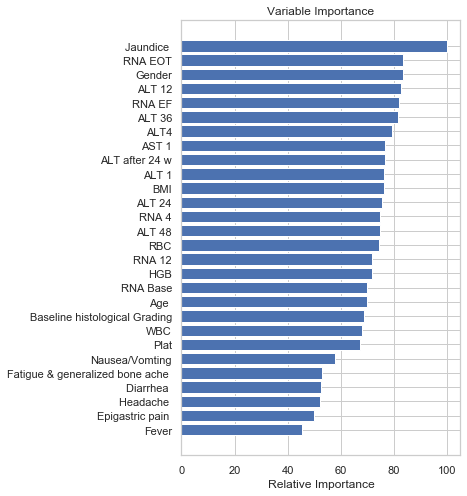

In [30]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
# Plot feature importance
feature_importance = model.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
plt.figure(figsize=(5,8))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, df.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
v_xgb = list(df.columns[sorted_idx])
v_xgb.reverse()
print("XGB Feature Importance Order: \n", v_xgb)
plt.show()

In [31]:
f_imp=[]
for i in rf_ord[0:5]:
    for j in erf_ord[0:5]:
        if i == j:
            f_imp.append(i)
for i in v_gb[0:5]:
    for j in v_xgb[0:5]:
        if i == j:
            f_imp.append(i)
print("The most prominent features that contributed to disease levels in the treated patients are: ", f_imp)


The most prominent features that contributed to disease levels in the treated patients are:  ['BMI', 'RNA Base', 'ALT 48', 'RNA EF']
